In [1]:
#Import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import DataFrame

In [2]:
#Import the raw data. Skip the first row containing a URL...
lc_raw_data = pd.read_csv(r'U:\Python\Lending Club Data\LoanStats_2019Q1.csv\LoanStats_2019Q1.csv', skiprows = [0])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,123,124,125,128,129,130,133,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#... and the last 4 rows that don't contain data
lc_raw_data = lc_raw_data.drop(lc_raw_data.index[[-1,-2]])

In [4]:
#Keep key columns for analysis
lc_select_data = lc_raw_data[['grade', 'sub_grade', 'loan_amnt', 'emp_title', 'int_rate','home_ownership', 'annual_inc',\
                              'purpose', 'addr_state', 'dti', 'open_acc', 'delinq_2yrs']]

In [5]:
#Check the data types
print(lc_select_data.dtypes)

grade              object
sub_grade          object
loan_amnt         float64
emp_title          object
int_rate           object
home_ownership     object
annual_inc        float64
purpose            object
addr_state         object
dti               float64
open_acc          float64
delinq_2yrs       float64
dtype: object


Convert the interest rate from object to num by removing % and converting to float and check again

In [6]:
lc_select_data['int_rate'] = (lc_select_data['int_rate'].str.split()).apply(lambda x: float(x[0].replace('%', '')))
print(lc_select_data.dtypes)

grade              object
sub_grade          object
loan_amnt         float64
emp_title          object
int_rate          float64
home_ownership     object
annual_inc        float64
purpose            object
addr_state         object
dti               float64
open_acc          float64
delinq_2yrs       float64
dtype: object


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [7]:
#Drop rows with at least 1 missing value in any column
lc_select_data = lc_select_data.dropna()

In [8]:
#Print out descriptive statistics of the data
lc_select_data.describe()

,loan_amnt,int_rate,annual_inc,dti,open_acc,delinq_2yrs
count,96140.000000,96140.000000,9.614000e+04,96140.000000,96140.000000,96140.000000
mean,16940.094394,12.691447,8.781792e+04,19.915944,11.990160,0.232702
std,10349.230141,4.839181,1.125833e+05,12.995128,6.034999,0.761942
min,1000.000000,6.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,9600.000000,8.190000,5.100000e+04,12.400000,8.000000,0.000000
50%,15000.000000,11.800000,7.200000e+04,18.540000,11.000000,0.000000
75%,24000.000000,15.570000,1.020700e+05,25.620000,15.000000,0.000000
max,40000.000000,30.890000,9.000000e+06,999.000000,72.000000,21.000000


Remove data where annual income and dti are more the mean + 3 stdev as outliers

In [9]:
lc_clean_data = lc_select_data.loc[(lc_select_data['annual_inc'] <= lc_select_data['annual_inc'].quantile(0.9))]
lc_clean_data = lc_clean_data.loc[(lc_clean_data['dti'] <= lc_clean_data['dti'].quantile(0.9))]

In [10]:
#Print out descriptive statistics of the cleaned data
lc_clean_data.describe()

,loan_amnt,int_rate,annual_inc,dti,open_acc,delinq_2yrs
count,79044.000000,79044.000000,79044.00000,79044.000000,79044.000000,79044.000000
mean,15946.693930,12.597355,74928.07236,17.859709,11.430634,0.229012
std,9861.049451,4.786974,30628.06021,7.629556,5.758732,0.754882
min,1000.000000,6.000000,0.00000,0.000000,0.000000,0.000000
25%,8500.000000,8.190000,50000.00000,12.180000,7.000000,0.000000
50%,14000.000000,11.800000,70000.00000,17.820000,10.000000,0.000000
75%,21000.000000,15.570000,95000.00000,23.660000,14.000000,0.000000
max,40000.000000,30.840000,150000.00000,33.120000,72.000000,21.000000


In [12]:
#Descriptive plots of the data

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


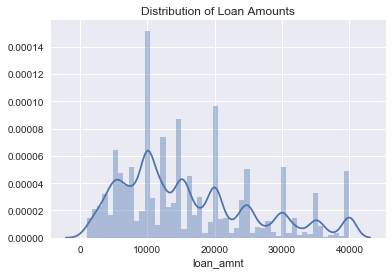

In [13]:
%matplotlib inline
sns.distplot(lc_clean_data['loan_amnt'])
plt.title('Distribution of Loan Amounts')

The loan amounts issued peak at multiples of 10K, with $10K being most popular

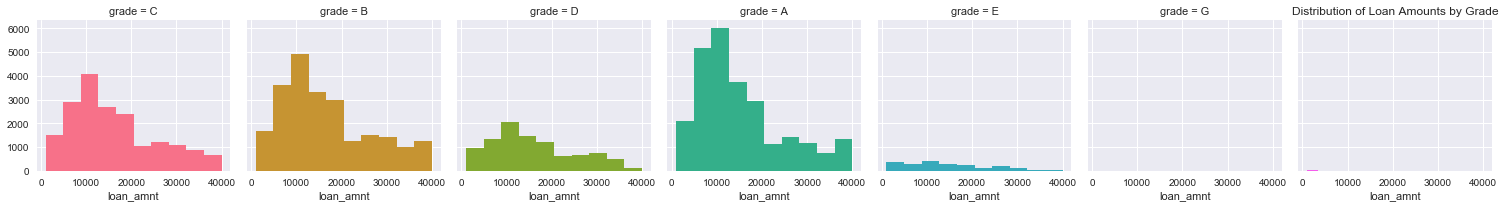

In [30]:
g = sns.FacetGrid(lc_clean_data, col = 'grade', hue = 'grade')
g = g.map(plt.hist, "loan_amnt")
plt.title('Distribution of Loan Amounts by Grade')

Splitting the histograms by grade, we can see that most volume comes from grades A through D

In [15]:
#Let's keep just the A grade for further analyses
lc_A_clean = lc_clean_data.loc[(lc_clean_data['grade'] == 'A')]

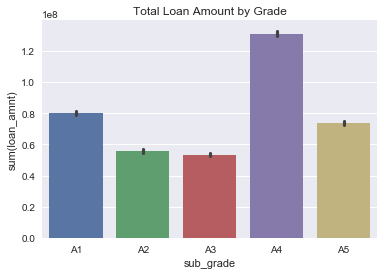

In [16]:
#Plotting total dollars lent by sub-grade
sns.barplot(x='sub_grade', y='loan_amnt', data = lc_A_clean, estimator = sum, order = ['A1','A2','A3','A4','A5'])
plt.title('Total Loan Amount by Grade')

Most of the lending happens in the A4 sub-grade

Let us now look at some relationships between int rate and risk factors like DTI, income and delinquency

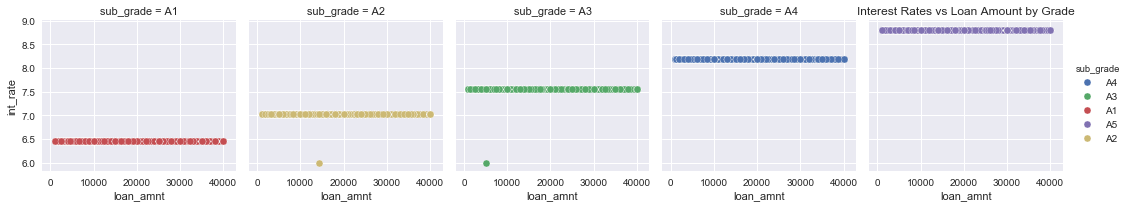

In [17]:
g = sns.FacetGrid(lc_A_clean, col = 'sub_grade', hue = 'sub_grade', col_order = ['A1','A2','A3','A4','A5'])
g = (g.map(plt.scatter, "loan_amnt", "int_rate", edgecolor = 'w', ).add_legend())
plt.title('Interest Rates vs Loan Amount by Grade')
#The interest rate seems to vary by sub grade within each grade regardless of loan amount

How does the loan amount correlate with other variables?

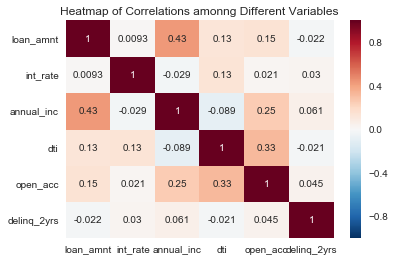

In [18]:
sns.heatmap(lc_A_clean.corr(), annot = True)
plt.title('Heatmap of Correlations amonng Different Variables')

Examining the heatmap, it seems that the loan amount is most correlated to income

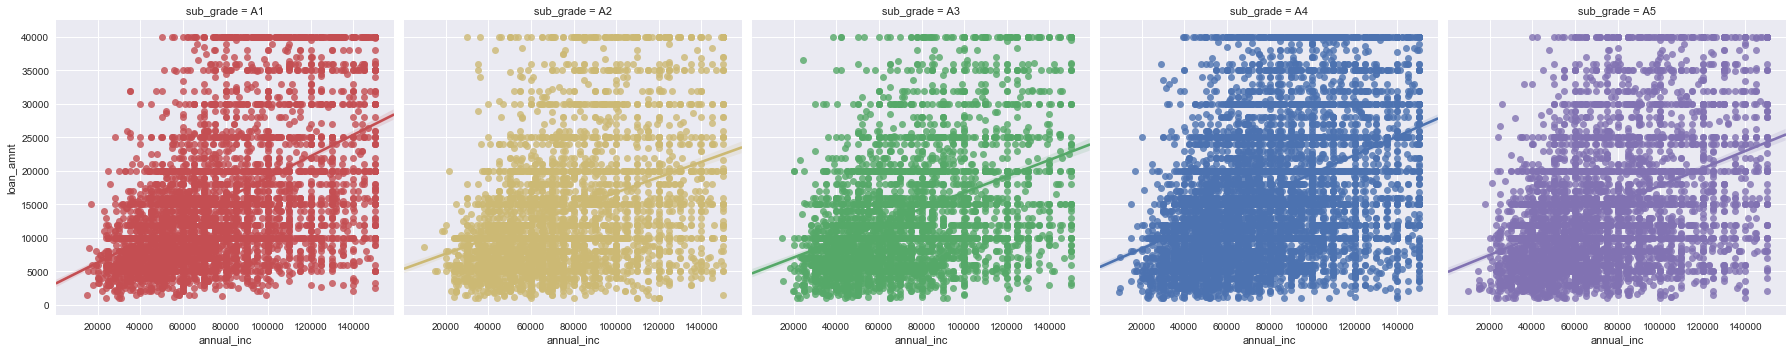

In [19]:
#Let's examine this via a scatter plot
sns.lmplot(x='annual_inc', y = 'loan_amnt', col = 'sub_grade', hue = 'sub_grade',data = lc_A_clean, col_order = ['A1','A2','A3','A4','A5'])

There seems to be positive relationship between the two. Let's now examine the loan amount by home ownership

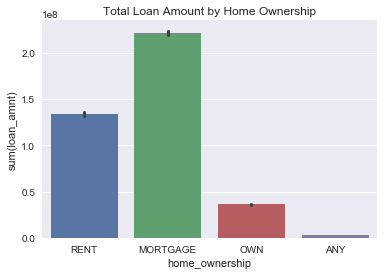

In [21]:
#Total Loan Amount by home ownership
sns.barplot(x='home_ownership', y='loan_amnt', data = lc_A_clean, estimator = sum)
plt.title('Total Loan Amount by Home Ownership')

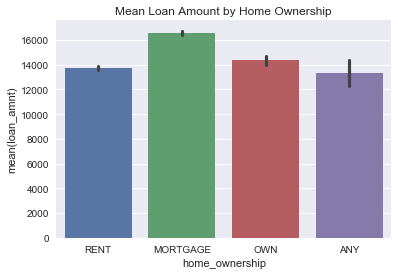

In [22]:
#Mean Loan Amount by home ownership
sns.barplot(x='home_ownership', y='loan_amnt', data = lc_A_clean)
plt.title('Mean Loan Amount by Home Ownership')

Since most of the loans are towards renters and mortgage payers, let us run a t-test to see if there is a difference in the mean loan amount for these 2 groups

In [23]:
from scipy.stats import ttest_ind

renter = lc_A_clean[lc_A_clean['home_ownership'] == 'RENT']
mtg_payer = lc_A_clean[lc_A_clean['home_ownership'] == 'MORTGAGE']

ttest_ind(renter['loan_amnt'], mtg_payer['loan_amnt'])

Ttest_indResult(statistic=-21.921313065769919, pvalue=1.9349518899163124e-105)

The test returns a very small p-value, thereby rejecting the null hypothesis that there is no difference in the mean loan amounts by renter or mortgage payer